# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [111]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme, position_stack, stat_identity, theme_minimal

In [112]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [113]:
# Code here
df_titanic = df_titanic[
    (df_titanic['class'] == '1st') | (df_titanic['class'] == '2nd') | (df_titanic['class'] == '3rd')]
joint_dist = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize=True)

In [114]:
joint_dist

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [115]:
# Code here
# Conditional distribution of class given where they embarked
cond_class_given_embarked = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize='columns')
cond_class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [116]:
# Conditional distribution of embarkation point given passenger class
cond_embarked_given_class = pd.crosstab(df_titanic['class'], df_titanic['embarked'], normalize='index')
cond_embarked_given_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [117]:
# 1. What proportion of 3rd class passengers embarked at Southampton?
third_class_southampton = cond_embarked_given_class.loc['3rd', 'S']
print(third_class_southampton)

0.6967559943582511


In [118]:
# 2. What proportion of Southampton passengers were in 3rd class?
southampton_third_class = cond_class_given_embarked.loc['3rd', 'S']
print(southampton_third_class)

0.5404814004376368


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

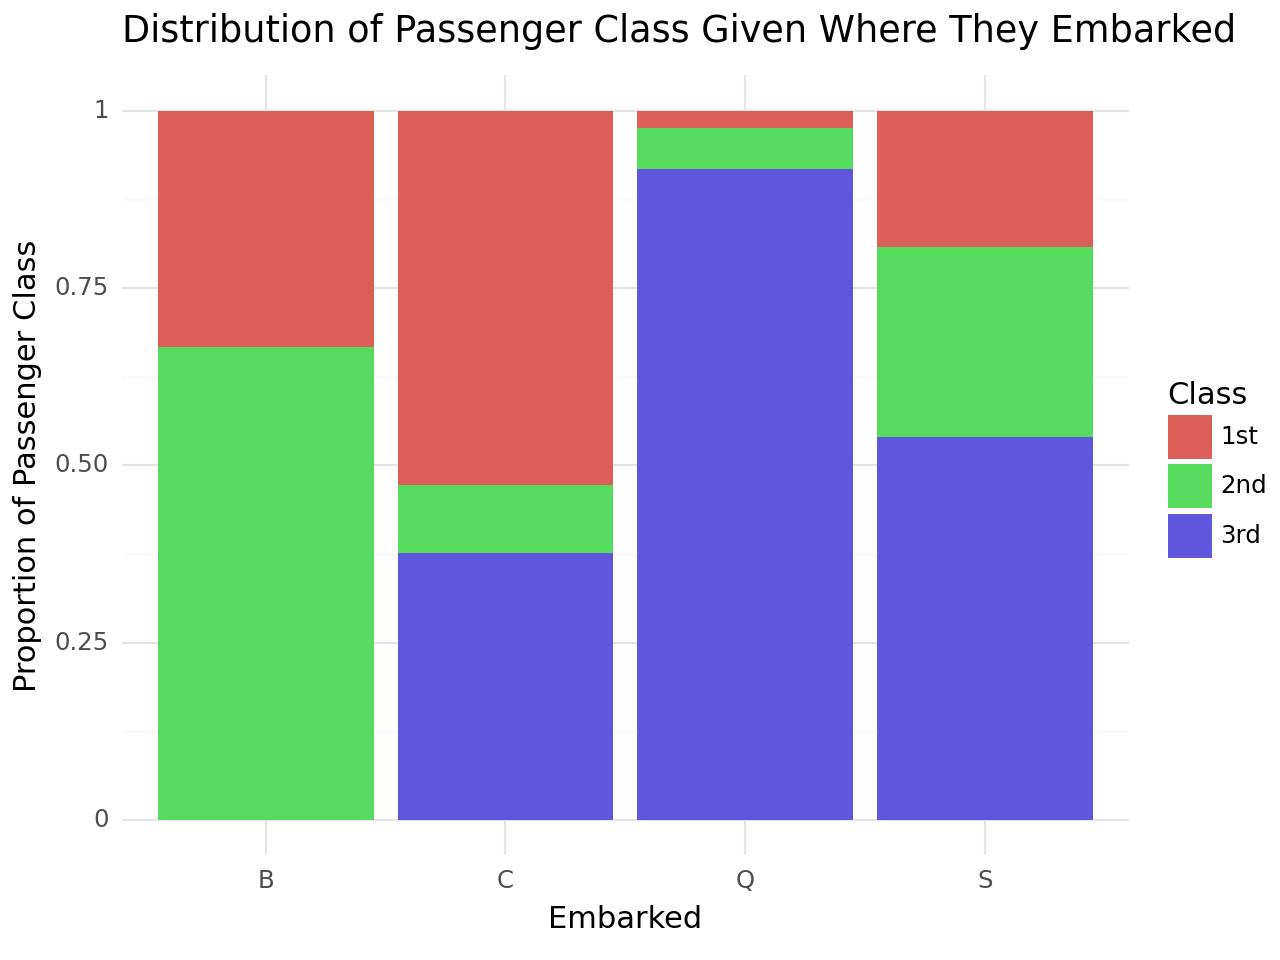

<Figure Size: (640 x 480)>

In [119]:
# Code here
df_plot = cond_class_given_embarked.reset_index().melt(id_vars='class', var_name='embarked', value_name='proportion')

# Create the bar plot using plotnine
(ggplot(df_plot, aes(x='embarked', y='proportion', fill='class')) +
    geom_bar(stat = "identity") + 
# With stat='identity': Since we have pre-calculated proportions this will plot the exact proportions instead of trying to count the occurrences again.
    labs(
        title="Distribution of Passenger Class Given Where They Embarked",
        x="Embarked",
        y="Proportion of Passenger Class",
        fill="Class"
    ) +
    theme_minimal()
)

Source: https://www.edureka.co/community/54923/error-stat-count-must-not-be-used-with-a-y-aesthetic#:~:text=This%20error%20comes%20due%20to,as%20used%20in%20mapping%20function.

Pros-

The stacked bar chart makes it easier for us to see the relative proportions of each class within each embarkation location, visually. This is especially useful when comparing across categories without needing to interpret numbers directly, and allows us to quickly draw quick conclusions like "No 3rd class passengers embarked from Belfast". 

Cons-

With this barplot, we can't directly extract precise values, so it's less useful when exact numeric answers are required for the kinds of conditional probability questions we addressed before. Also, there is not a way to know how this plot was calculated, as I could have made a similar plot with the conditional distribution of embarkation location given their class.